# Describing our Question

**a) Understanding the context**

The trend of fatal police shootings has been increasing since 2015. The rate of fatal police shootings in the United States shows a large difference based on ethnicity. This study therefore seeks  to investigate the main factors that influence police shootings in the United States  in order to  understand police decision making while conducting suspect arrest.


**b) Specifying the Question**

To investigate the main factors that influence police shootings in the United States  in order to  understand police decision making while conducting suspect arrest. 


**b) Defining the Metric of success**

The analysis to be considered successful we shall provide insights on the factors that highly influence police shootings in the United States  and understand police decision making while conducting suspect arrest and correctly test our hypotheses.


**d)  Recording the Expereimental Design**

The following steps shall be followed:

*   Defining the Question
*   Reading the Data.
*   Exploring the Data.
*   Data Cleaning
*   Exploratory Data analysis (Performing Univariate and Bivariate Analysis)
*   Creating Visualizations.
*   Hypothesis Testing.
*  Summary

#**1. DEFINING THE HYPOTHESIS**

##1a. Overview



Null hypothesis: Type null hypothesis here

Alternative hypothesis: Type alt hyopthesis here

Keys

$H_{0}$ = Null hypothesis

$H_{1}$ = Alternative hypothesis

$mu_{1}$ = Type variable here (mean)

$mu_{2}$ = Type variable here (mean)

$H_{0}$: $mu_{1}$ = $mu_{2}$


$H_{1}$: $mu_{1}$ ≠ $mu_{2}$

##1b. Research Question

1. What are  the main factors influencing police shootings?
2. Are the police  biased towards certain individuals?
3. How are police shootings distributed across different states and cities?


##1c. Sampling Strategy

###Sampling Plan

###Sampling Method

###Sample Size

# **2. IMPORTING LIBRARIES**




In [ ]:
# import pandas

import pandas as pd

# import numpy

import numpy as np

# import datetime

import datetime

# import seaborn

import seaborn as sns

# import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook

# import pandas profiling

import pandas_profiling

# immport scipy

import scipy.stats as stats

#import math

from math import sqrt

#import ttest
from scipy.stats import ttest_ind

from scipy.stats import t

from sklearn.preprocessing import LabelEncoder

import scipy

# **3. LOADING OUR DATASETS**

In [ ]:
#loading our dataset
url = '/content/Us_shootings.csv'
df = pd.read_csv(url)


In [ ]:
#previewing the top
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
#previewing the bottom
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,6/15/2020,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [ ]:
#previewing random sample of 5 records
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
454,580,Joshua Crittenden,6/27/2015,shot,gun,35.0,M,White,Tahlequah,OK,False,attack,Not fleeing,True,Guns
4323,5216,Claudia Nadia Rodriguez,10/21/2019,shot,gun,37.0,F,Hispanic,Henderson,NV,False,attack,Not fleeing,True,Guns
3399,3985,Jeffrey Dennis,8/20/2018,shot,vehicle,36.0,M,Black,Philadelphia,PA,False,attack,Car,False,Vehicles
1230,1439,Marvin Cremeans,4/6/2016,shot,ax,60.0,M,White,Oak Hill,OH,False,other,Not fleeing,False,Blunt instruments
129,170,Bradford Leonard,2/22/2015,shot,gun,50.0,M,White,Palm Bay,FL,False,attack,Not fleeing,False,Guns


# **4. GETTING MORE INFORMATION ABOUT OUR DATASET**. 

In [ ]:
#getting the shape of our dataset
df.shape

(4895, 15)

In [ ]:
#getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [ ]:
#finding out parameters of our dataset
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [ ]:
#find out unique values in each column
df.nunique()

id                         4895
name                       4851
date                       1792
manner_of_death               2
armed                        89
age                          76
gender                        2
race                          6
city                       2288
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
arms_category                12
dtype: int64

# **5. CLEANING THE DATA**

In [ ]:
#redifining our columns

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
#Checking our renaming result
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [ ]:
#finding out how many duplicate rows are in our dataset

len(df)-len(df.drop_duplicates())

#there are no duplicates

0

In [ ]:
#check for null values if any
df.isnull().sum()

#there are no null values in our dataset

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


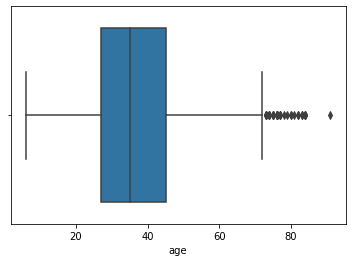

In [ ]:
# Checking for Outliers & Anomalies in the age column as it is our only numerical column
sns.boxplot(df['age'])
  
plt.show()

We decided to keep our outliers because we saw that the data will be useful in our analysis when analysing about age.

**Anomilies**

In [ ]:
#Selecting the categorical columns
cat_cols = df.select_dtypes(include ='object').columns.to_list()
cat_cols


# Check for unique values in each column
for col in cat_cols:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('...........')
  print('\n')

name column unique values: 

['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ... 'Hannah Fizer'
 'William Slyter' 'Nicholas Hirsh']
...........


date column unique values: 

['1/2/2015' '1/3/2015' '1/4/2015' ... '6/12/2020' '6/13/2020' '6/15/2020']
...........


manner_of_death column unique values: 

['shot' 'shot and Tasered']
...........


armed column unique values: 

['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'unknown' 'shovel'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'metal object'
 'screwdriver' 'lawn mower blade' 'flagpole' 'guns and explosives'
 'cordless drill' 'metal pole' 'Taser' 'metal pipe' 'metal hand tool'
 'blunt object' 'metal stick' 'sharp object' 'meat cleaver' 'carjack'
 'chain' "contractor's level" 'stapler' 'crossbow' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain saw' 'garden tool'
 'scissors' 'pole' 'pick-axe' 'flashlight' 'vehicle' 'spear' 'chair'


In [ ]:
#convert date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Check if data was corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   float64       
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

from the output our data seems clean, no null values and no duplicates, no outliers and we have standard names for all columns

# **6. EXPORT CLEAN DATA**

In [ ]:
#saving the cleaned dataset
df = df.to_csv('us_police_shooting.csv')

#df = df_sample.to_excel('name.xlsx')


In [ ]:
#loading the saved clean dataset
df = pd.read_csv('/content/us_police_shooting.csv')
# df = df.set_index('id')
df.drop(['Unnamed: 0'],axis=1,inplace = True)


# **7. Exploratory Analysis**

## a) Univariate Analysis

### ***Measures of Central Tendency***

In [ ]:
#getting summary
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895.000000,4895,4895,4895,4895,4895.000000,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,NaN,4851,1792,2,89,NaN,2,6,2288,51,2,3,4,2,12
top,NaN,TK TK,2018-01-06,shot,gun,NaN,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,NaN,29,9,4647,2755,NaN,4673,2476,78,701,3792,3160,3073,4317,2764
mean,2902.148519,NaN,NaN,NaN,NaN,36.549750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1683.467910,NaN,NaN,NaN,NaN,12.694348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1441.500000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2847.000000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4352.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mode
# Calculating mode across different columns

df[['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category']].mode().head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,TK TK,2018-01-06,shot,gun,25.0,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns


In [ ]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'], 
       'The most appearing record': ['3','TK','2018-01-06','shot','gun','25','Male','White','Los Angelos','CA','False','attack','Not Fleeing','False','Guns']} 
modedf =pd.DataFrame(data)
modedf

,Criteria,The most appearing record
0,id,3
1,name,TK
2,date,2018-01-06
3,manner_of_death,shot
4,armed,gun
5,age,25
6,gender,Male
7,race,White
8,city,Los Angelos
9,state,CA


In [ ]:
# Mean
# Calculating the mean for our numerical columns
df[['age']].mean(axis=0)

age    36.54975
dtype: float64

> The average age of people who were shot is   37

In [ ]:
# Median
# Calculating the median for our numerical columns

df[['age']].median(axis=0)

age    35.0
dtype: float64

> The median age of people who were shot is 35

### ***Measures of Dispersion***

In [ ]:
# Standard Deviation & Variance
# We will now calculate the standard deviation and variance to check the spread of our data from the mean
range1 = df['age'].max() - df['age'].min()

std = df['age'].std()
var = df['age'].var()
print('Range: "Age" ', range1) 
print('Std deviation:', std)
print('Variance:', var)

Range: "Age"  85.0
Std deviation: 12.694348090758691
Variance: 161.1464734493488


column has a high standard deviation and variance, showing that they're both spread over a wide range as evidenced by the ranges

In [ ]:
# Skewness
# We will now calculate the skewness to check the assymetry of the distribution
df['age'].skew()

0.7149514194510787

> Our age column is positively skewed, indicating that the tail is bigger on the left side

In [ ]:
# Kurtosis
# We will now calculate the kurtosis to check the tail of our distribution
df['age'].kurt()

0.1658018205712728

Low kurtosis exhibit tail data that are generally less extreme than the tails of the normal distribution. This indicates that we have a platykurtic distribution


Skewness: 0.7149514194510787
Kurtosis: 0.1658018205712728


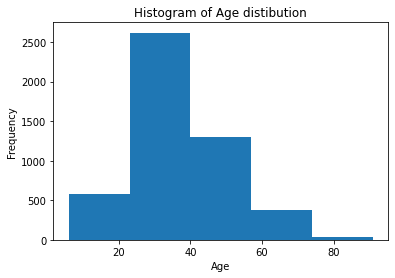

In [ ]:
print('Skewness:',df['age'].skew())
print("Kurtosis:",df['age'].kurt())
plt.hist(df['age'], bins=5)
plt.title('Histogram of Age distibution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Creating a subset with first strata sample data

#one_sample =  df_sample.loc[df2_sample['column name']==row value] 

#Creating a subset with second strata sample data
#two_sample =  df_sample.loc[df2_sample['column name']==row value] 

#one_sample.head()
#two_sample.head()

In [ ]:
#df_sample.columns

In [ ]:
# Creating a stratified random sample by grouping the dataset by variable a/ variable b
# Then extracting sample units from each group
# The sample size is calculated with 0.05 as the margin of error, and 95% as the confidence level 

#df_sample = df.groupby('column name', group_keys=False).apply(lambda x : x.sample(replace='False', frac=((4895/(1+4895*(0.05**2)))/10024)))

# Print the number of sample units from each strata
#print(df_sample['column name'].value_counts())

# Display some of the sample data 
#df_sample

##Univariate Plots

In [ ]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [ ]:
# col=['armed',
#        'gender', 'race', 'city', 'signs_of_mental_illness',
#        'threat_level', 'flee', 'body_camera', 'arms_category']
# fig, ax = plt.subplots(len(col), figsize=(5,10))
# for i, col_val in enumerate(col()):
#     sns.distplot(df[col_val], ax=ax[i], kde=True, color='blue')
#     ax[i].set_title('Box plot - {}'.format(col_val))
#     ax[i].set_xlabel(col_val)
# plt.show()

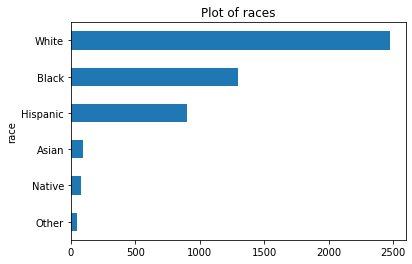

In [ ]:
#Visualization of race  
df.groupby('race')['race'].count().sort_values(ascending=True).plot(title = 'Plot of races', kind = 'barh')

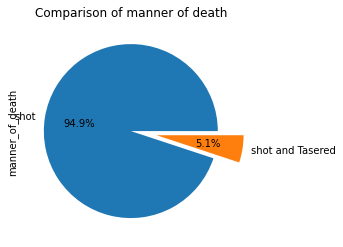

In [ ]:
#Visualization of manner of death
explode=(0,0.3)
df.groupby('manner_of_death').manner_of_death.count().plot(title = 'Comparison of manner of death', 
                                                                  kind = 'pie',autopct='%1.1f%%', explode=explode);

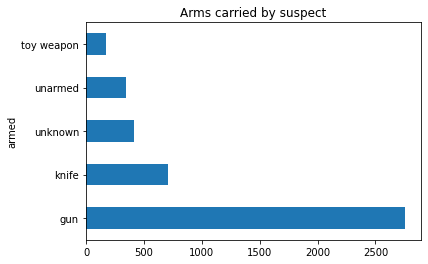

In [ ]:
#visulization of armed
df['armed'].value_counts()
df.groupby('armed')['armed'].count().sort_values(ascending=False).head().plot(title = 'Arms carried by suspect', 
                                                                  kind = 'barh');

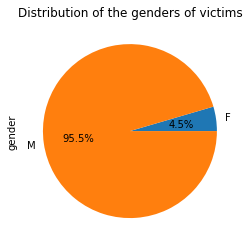

In [ ]:
#gender distibution
df.groupby('gender').gender.count().plot(title = 'Distribution of the genders of victims', kind = 'pie',autopct='%1.1f%%')

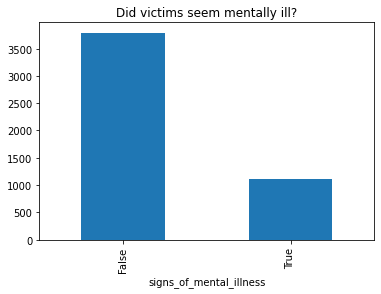

In [ ]:
#Plot of mental status
df.groupby('signs_of_mental_illness').signs_of_mental_illness.count().plot(title = 'Did victims seem mentally ill?', kind = 'bar')

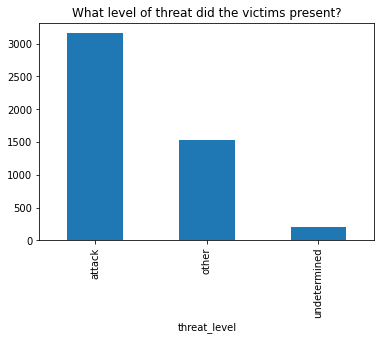

In [ ]:
#plotting threat level bar
df.groupby('threat_level').threat_level.count().plot(title = 'What level of threat did the victims present?', kind = 'bar')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

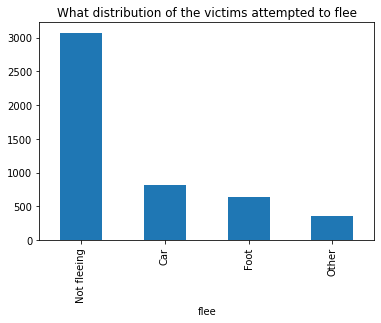

In [ ]:

#Visulazation of flee
df.groupby('flee').flee.count().sort_values(ascending=False).plot(title = 'What distribution of the victims attempted to flee',
                                                                  kind = 'bar', )
plt.xticks(rotation=90)

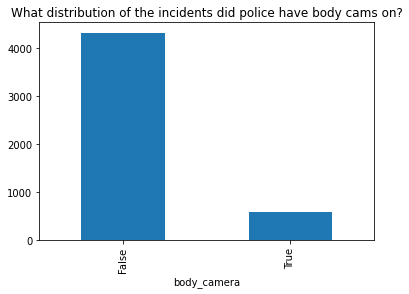

In [ ]:
#visualizing the body camera information 
df.groupby('body_camera').body_camera.count().plot(title = 'What distribution of the incidents did police have body cams on?', kind = 'bar')

##Bivariate Plots

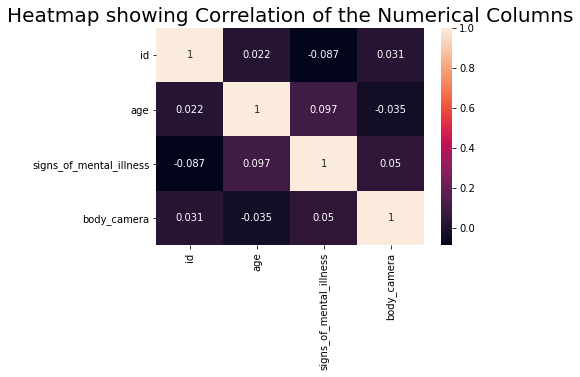

In [ ]:
#Calculating the correlation
corr = df.corr()
plt.figure()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.title('Heatmap showing Correlation of the Numerical Columns', fontsize = 20)
plt.show()

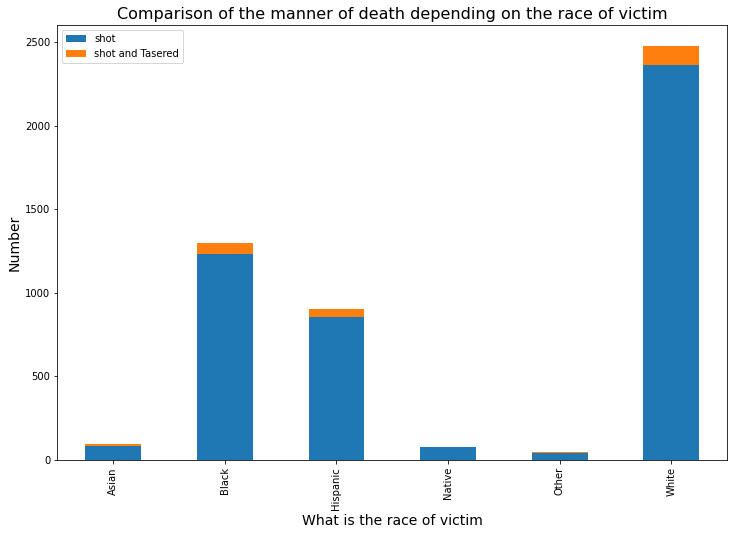

In [ ]:
#Plotting our bar graph 
df.groupby(['race','manner_of_death']).id.count().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,8),stacked = True)

# labels and title
plt.title('Comparison of the manner of death depending on the race of victim',fontsize=16)
plt.xlabel('What is the race of victim',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

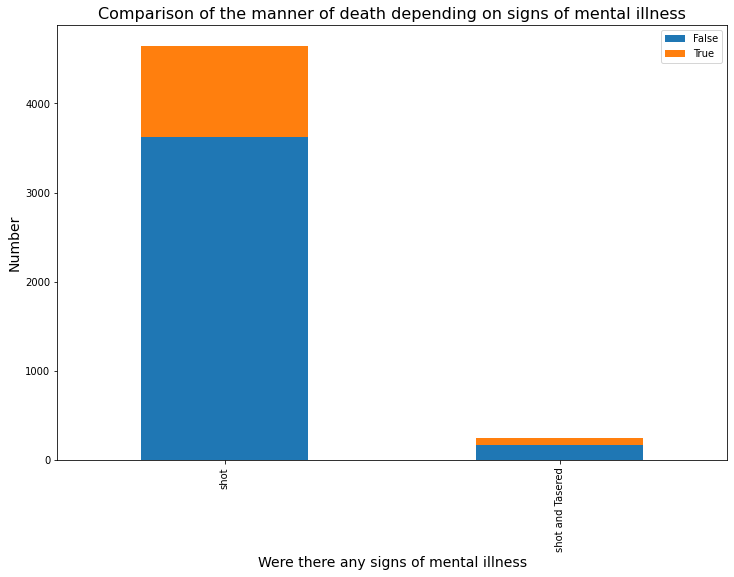

In [ ]:
#Plotting our bar graph 
df.groupby(['manner_of_death','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked = True)

# labels and title
plt.title('Comparison of the manner of death depending on signs of mental illness',fontsize=16)
plt.xlabel('Were there any signs of mental illness',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

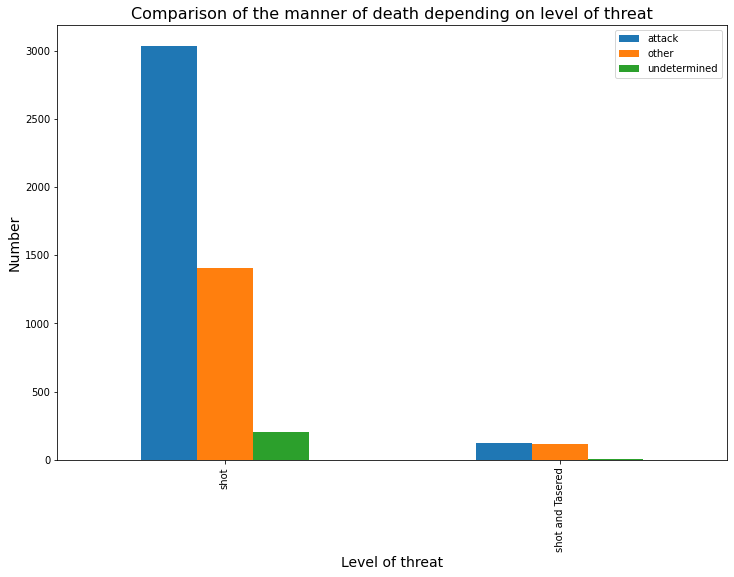

In [ ]:
#Plotting our bar graph 
df.groupby(['manner_of_death','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of the manner of death depending on level of threat',fontsize=16)
plt.xlabel('Level of threat',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

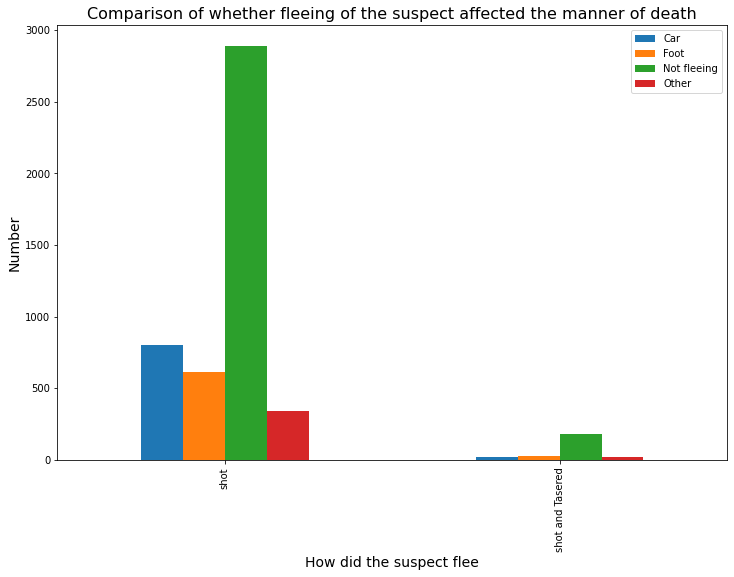

In [ ]:
#Plotting our bar graph 
df.groupby(['manner_of_death','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of whether fleeing of the suspect affected the manner of death',fontsize=16)
plt.xlabel('How did the suspect flee',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

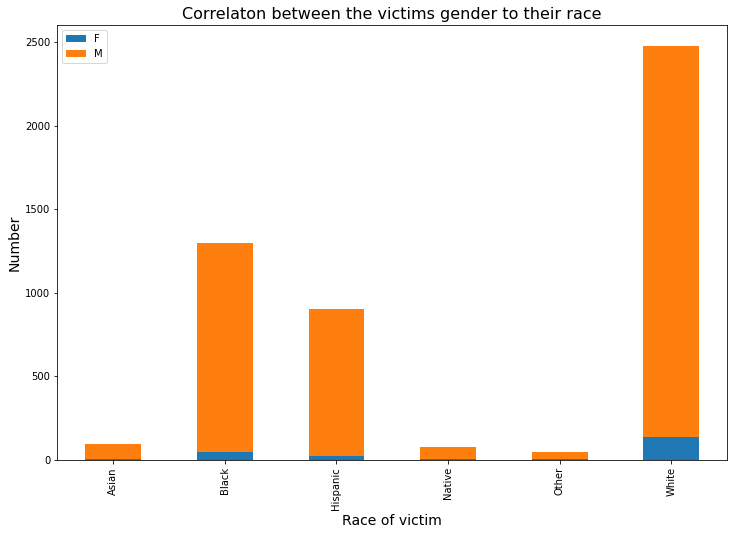

In [ ]:
#Plotting our bar graph 
df.groupby(['race','gender']).id.count().sort_values(ascending=False).unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to their race',fontsize=16)
plt.xlabel('Race of victim',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

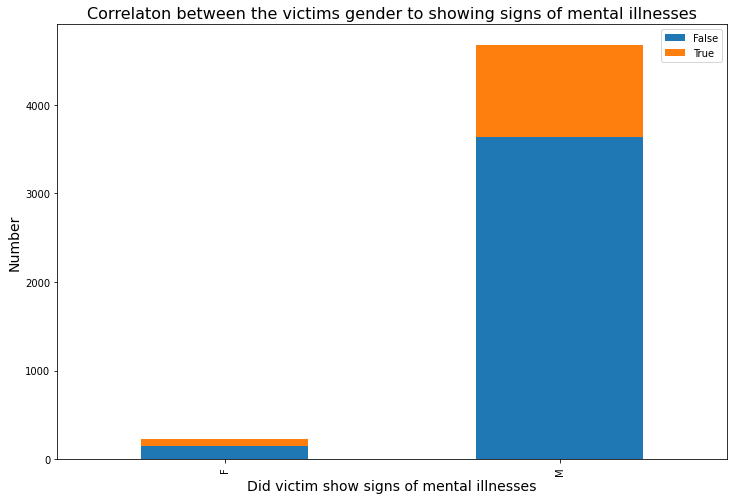

In [ ]:
#Plotting our bar graph 
df.groupby(['gender','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked=True) 

# labels and title
plt.title('Correlaton between the victims gender to showing signs of mental illnesses',fontsize=16)
plt.xlabel('Did victim show signs of mental illnesses',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

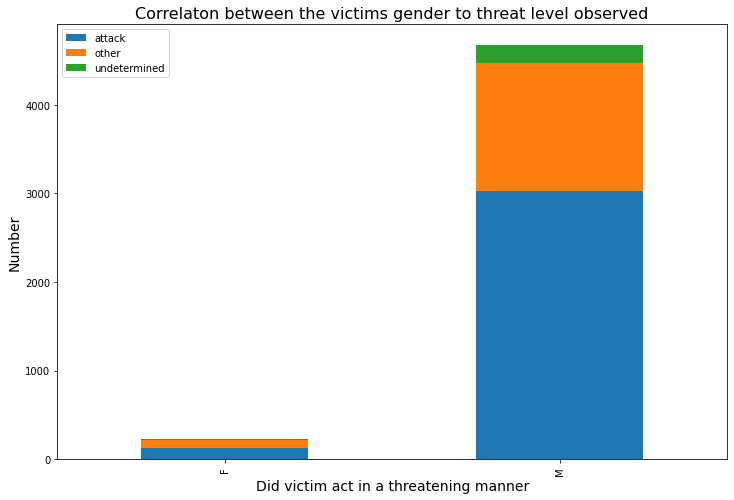

In [ ]:
#Plotting our bar graph 
df.groupby(['gender','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to threat level observed',fontsize=16)
# plt.xticks(rotation = 60)
plt.xlabel('Did victim act in a threatening manner',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

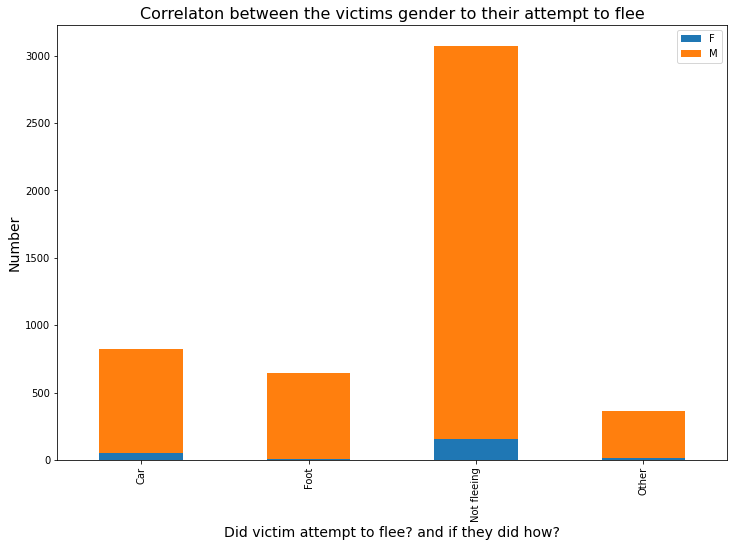

In [ ]:
#Plotting our bar graph 
df.groupby(['flee','gender']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender to their attempt to flee',fontsize=16)
plt.xlabel('Did victim attempt to flee? and if they did how?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

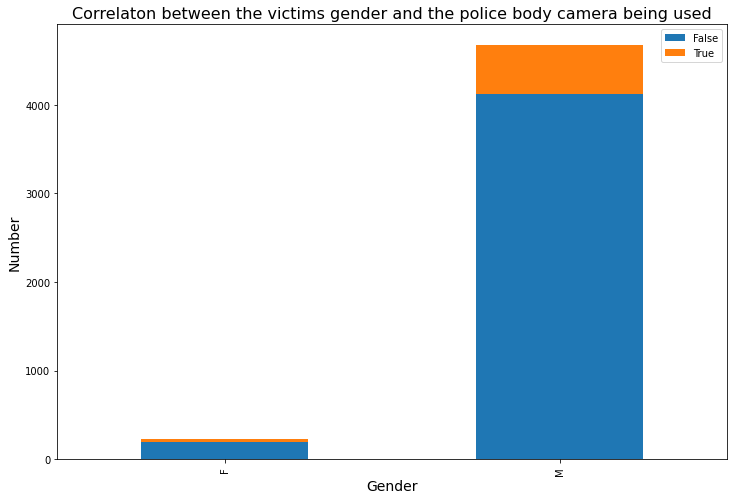

In [ ]:
#Plotting our bar graph 
df.groupby(['gender','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims gender and the police body camera being used',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

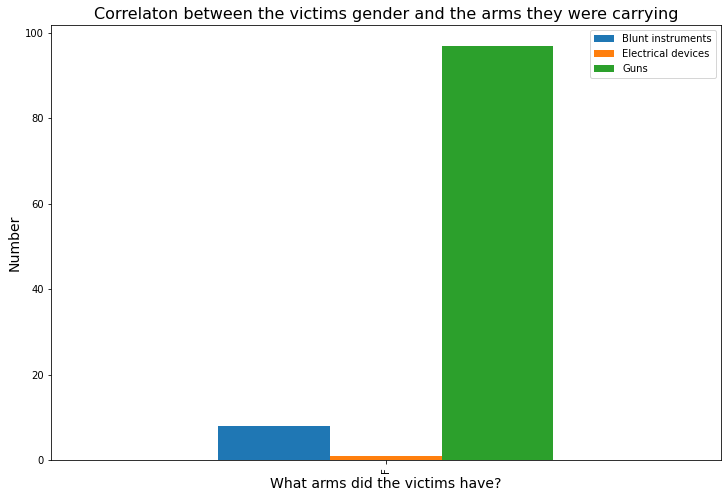

In [ ]:
#Plotting our bar graph 
df.groupby(['gender','arms_category']).id.count().head(3).unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims gender and the arms they were carrying',fontsize=16)
plt.xlabel('What arms did the victims have?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

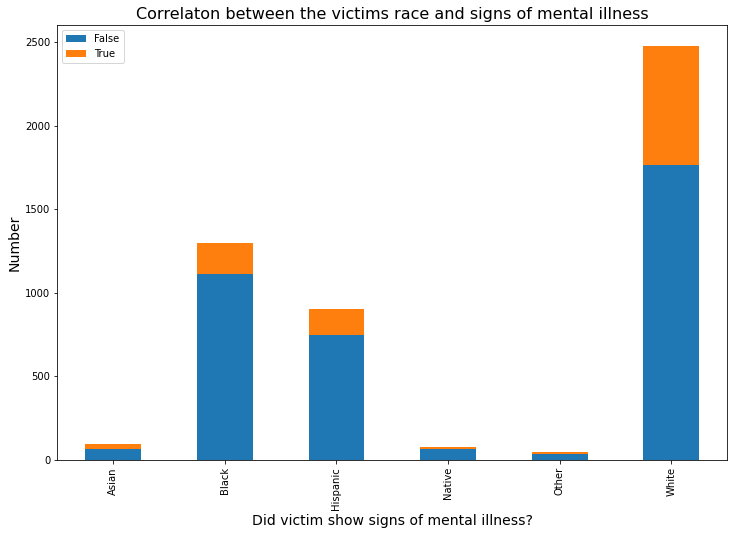

In [ ]:
#Plotting our bar graph 
df.groupby(['race','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and signs of mental illness',fontsize=16)
plt.xlabel('Did victim show signs of mental illness?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

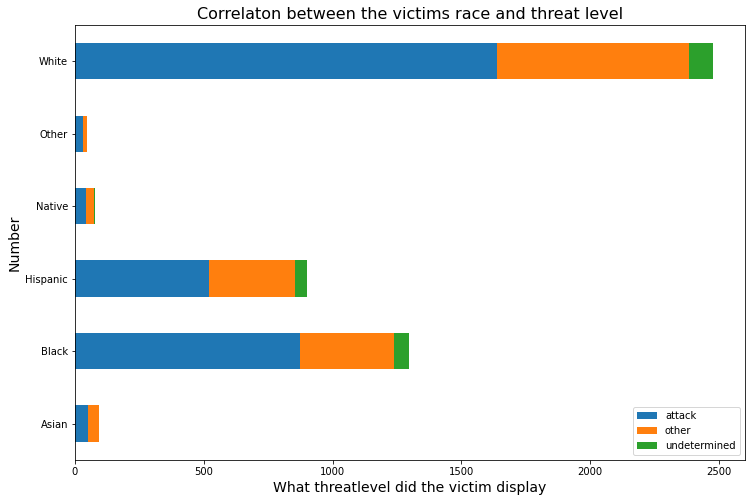

In [ ]:
#Plotting our bar graph 
df.groupby(['race','threat_level']).id.count().sort_values(ascending =True).unstack().plot(kind='barh',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and threat level',fontsize=16)
plt.xlabel('What threatlevel did the victim display',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

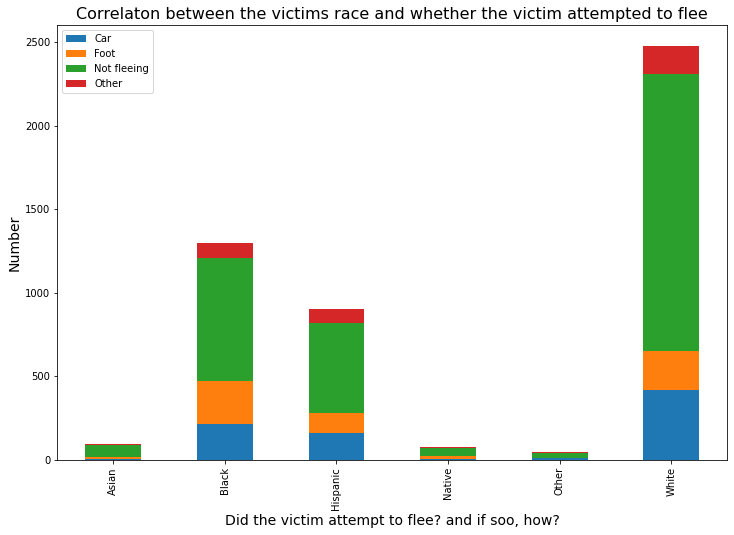

In [ ]:
#Plotting our bar graph 
df.groupby(['race','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8),stacked = True) 

# labels and title
plt.title('Correlaton between the victims race and whether the victim attempted to flee',fontsize=16)
plt.xlabel('Did the victim attempt to flee? and if soo, how?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

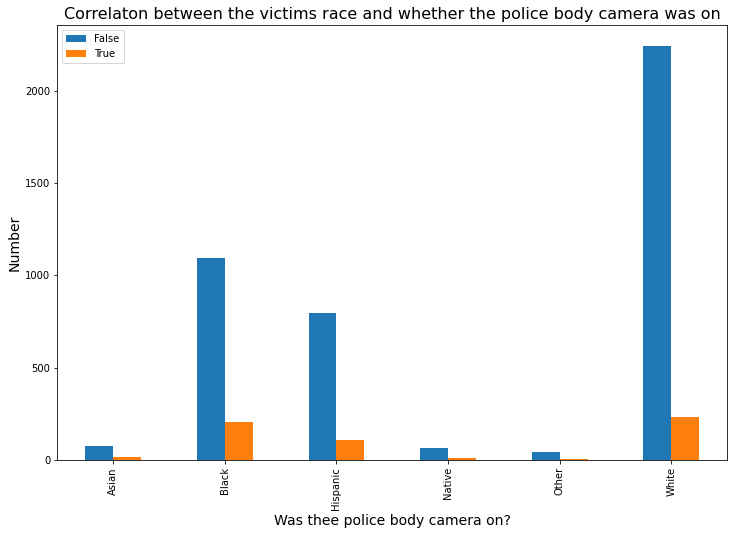

In [ ]:
#Plotting our bar graph 
df.groupby(['race','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims race and whether the police body camera was on',fontsize=16)
plt.xlabel('Was thee police body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

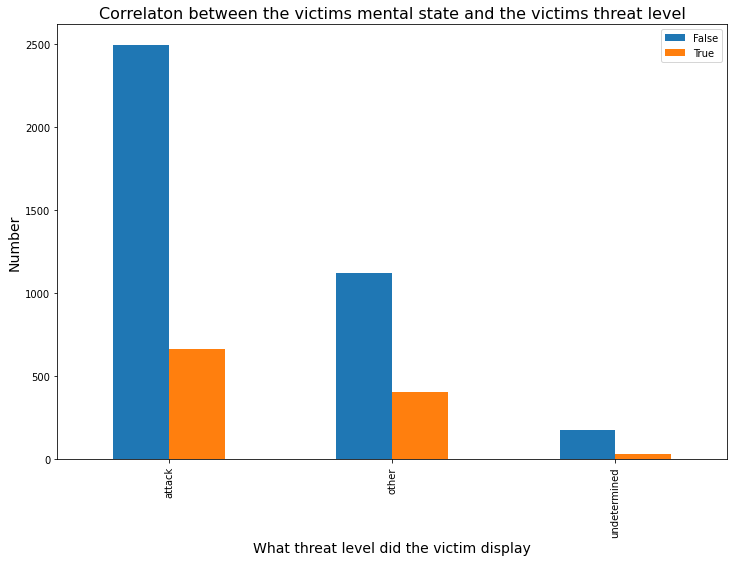

In [ ]:
#Plotting our bar graph 
df.groupby(['threat_level','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the victims threat level',fontsize=16)
plt.xlabel('What threat level did the victim display',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

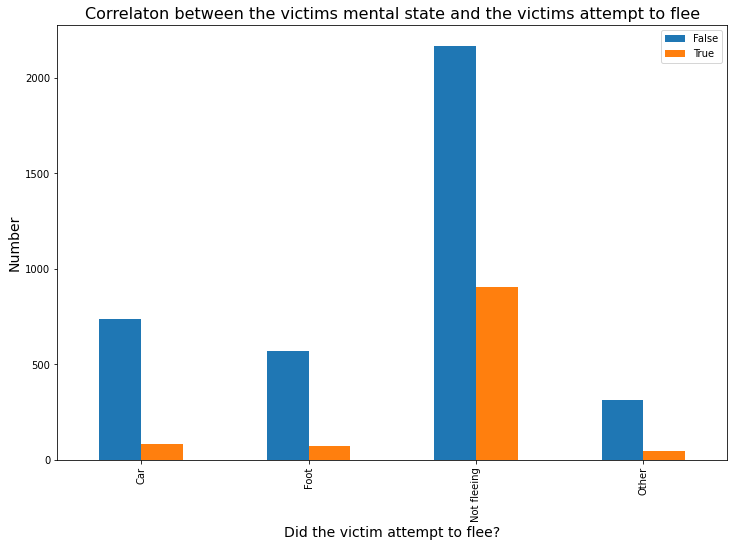

In [ ]:
#Plotting our bar graph 
df.groupby(['flee','signs_of_mental_illness']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the victims attempt to flee',fontsize=16)
plt.xlabel('Did the victim attempt to flee?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

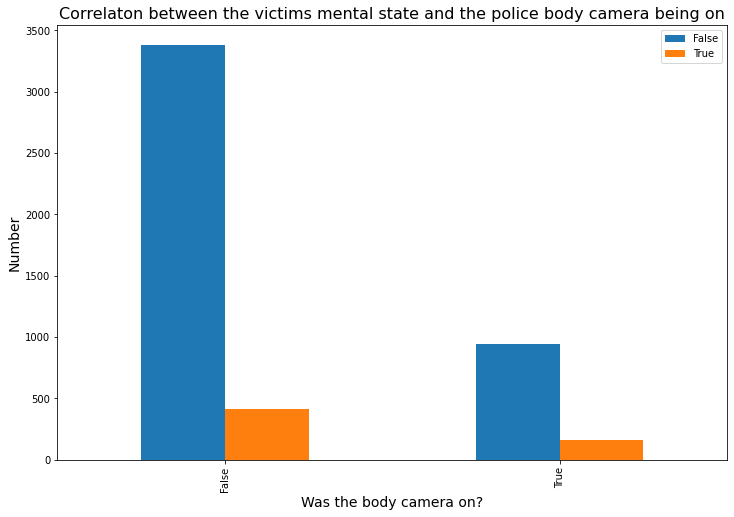

In [ ]:
#Plotting our bar graph 
df.groupby(['signs_of_mental_illness','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims mental state and the police body camera being on',fontsize=16)
plt.xlabel('Was the body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

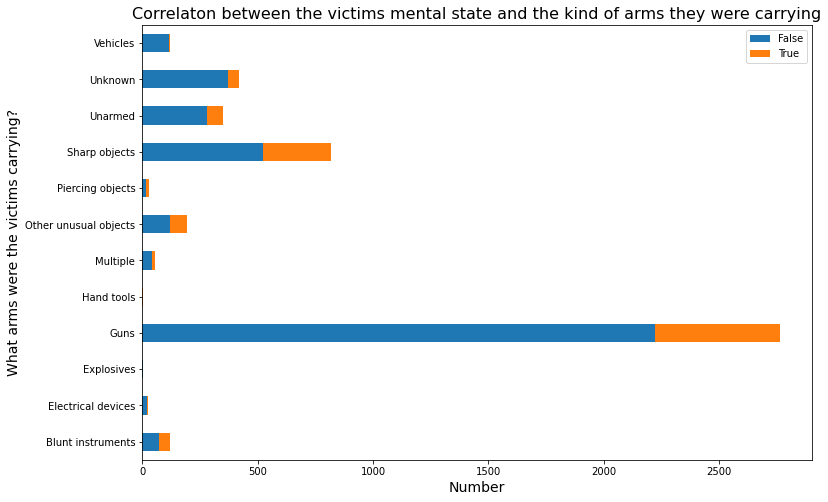

In [ ]:
#Plotting our bar graph 
df.groupby(['arms_category','signs_of_mental_illness']).id.count().unstack().plot(kind='barh',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims mental state and the kind of arms they were carrying',fontsize=16)
plt.ylabel('What arms were the victims carrying?',fontsize=14)
plt.xlabel('Number',fontsize=14)
plt.legend(fontsize=10)

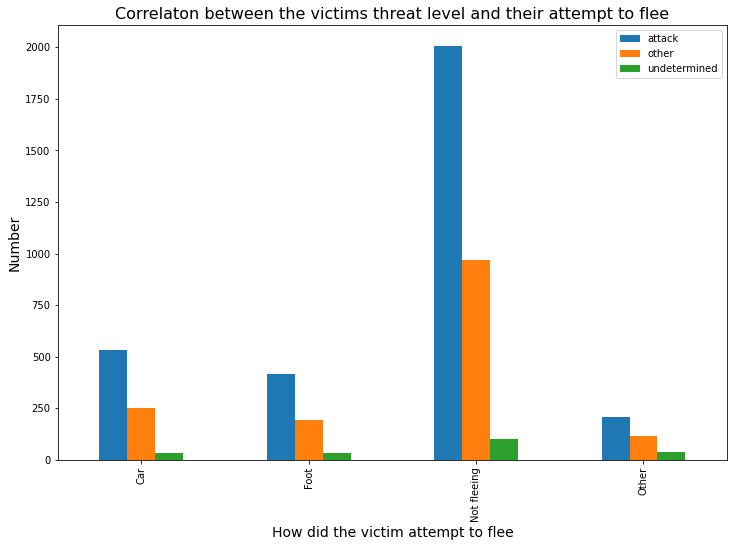

In [ ]:
#Plotting our bar graph 
df.groupby(['flee','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8)) 

# labels and title
plt.title('Correlaton between the victims threat level and their attempt to flee',fontsize=16)
plt.xlabel('How did the victim attempt to flee',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

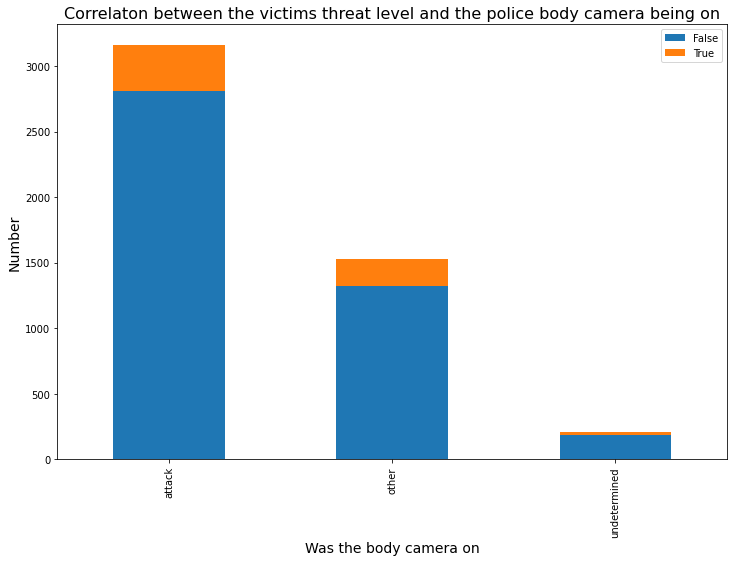

In [ ]:
#Plotting our bar graph 
df.groupby(['threat_level','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims threat level and the police body camera being on',fontsize=16)
plt.xlabel('Was the body camera on',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

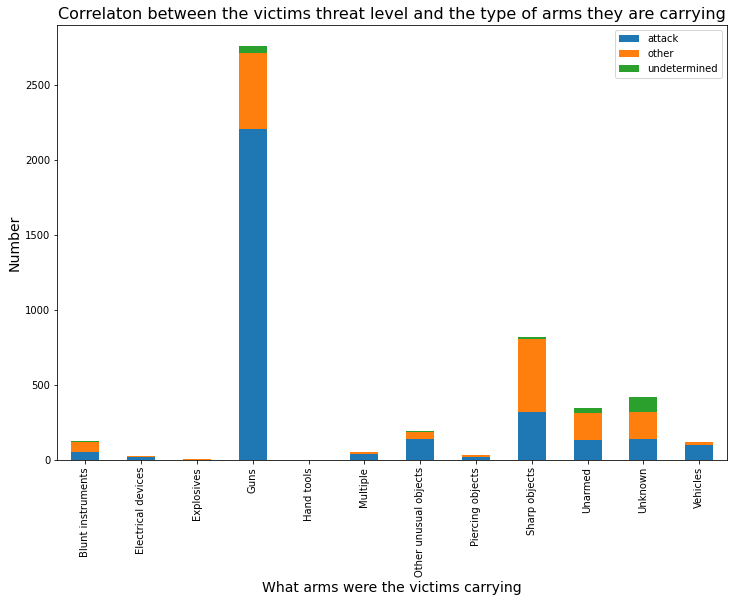

In [ ]:
#Plotting our bar graph 
df.groupby(['arms_category','threat_level']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims threat level and the type of arms they are carrying',fontsize=16)
plt.xlabel('What arms were the victims carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

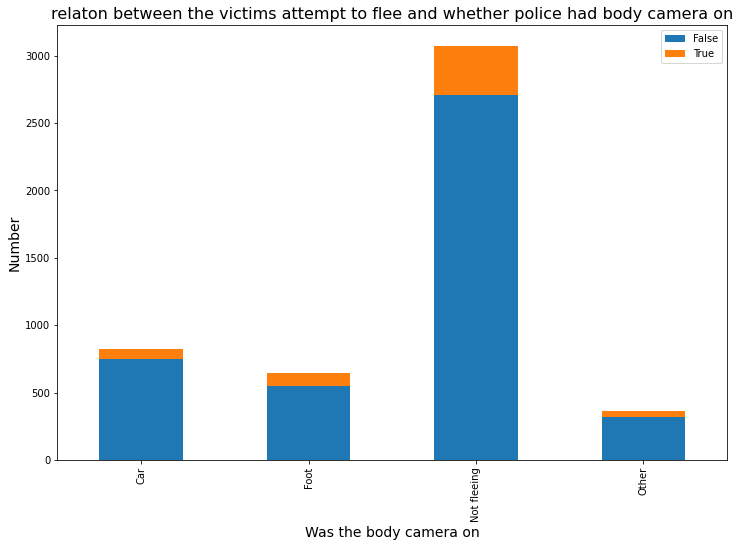

In [ ]:
#Plotting our bar graph 
df.groupby(['flee','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True)

# labels and title
plt.title('relaton between the victims attempt to flee and whether police had body camera on',fontsize=16)
plt.xlabel('Was the body camera on',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

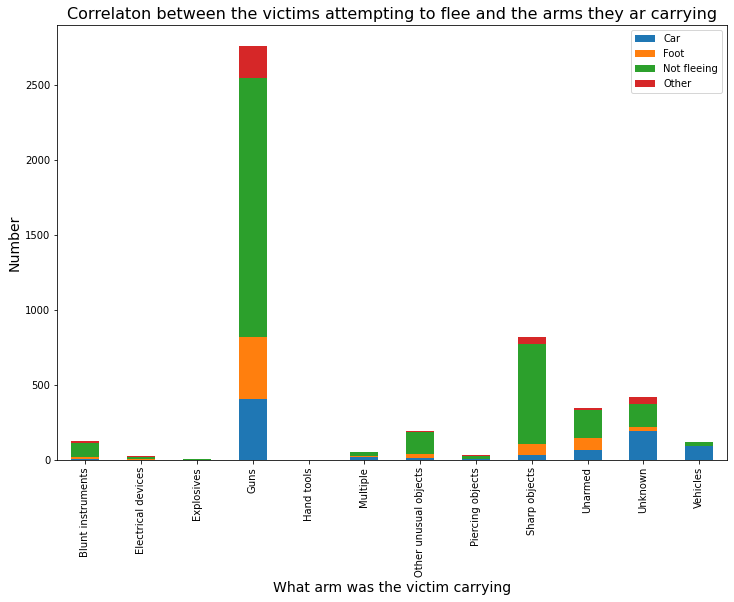

In [ ]:
#Plotting our bar graph 
df.groupby(['arms_category','flee']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the victims attempting to flee and the arms they ar carrying',fontsize=16)
plt.xlabel('What arm was the victim carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

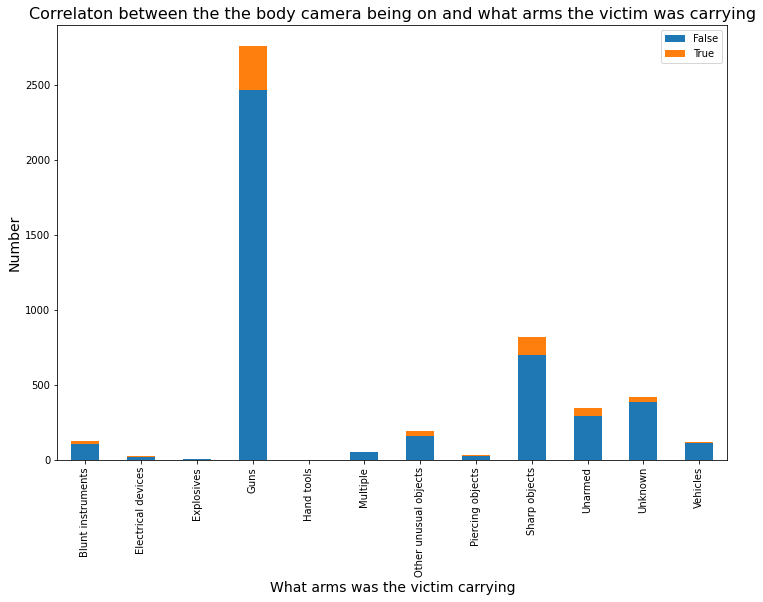

In [ ]:
#Plotting our bar graph 
df.groupby(['arms_category','body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8), stacked = True) 

# labels and title
plt.title('Correlaton between the the body camera being on and what arms the victim was carrying',fontsize=16)
plt.xlabel('What arms was the victim carrying',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

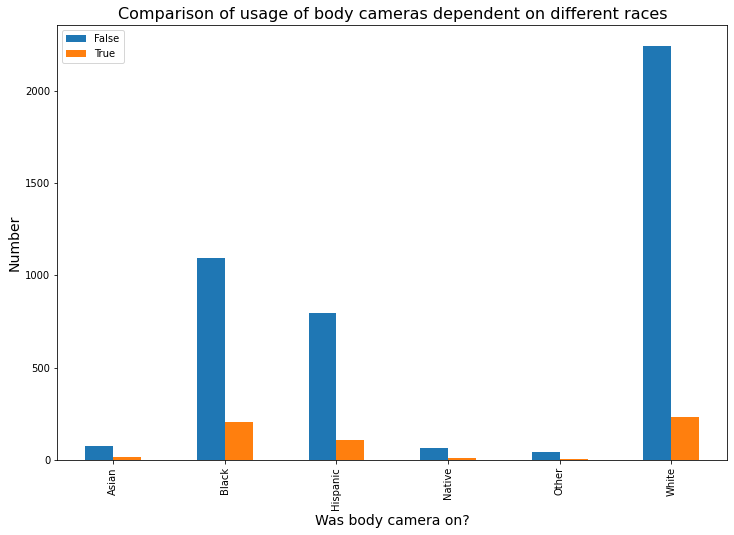

In [ ]:
#Plotting our bar graph 
df.groupby(['race', 'body_camera']).id.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of usage of body cameras dependent on different races',fontsize=16)
plt.xlabel('Was body camera on?',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

##Multivariate Plots

In [ ]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  
# from pandas_profiling import ProfileReport

# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# profile = ProfileReport(df, title='Pandas Profiling Report - Police Shooting in the US', explorative=True)
# profile.to_widgets()

In [ ]:
# ## Check the equality of the variances between the two groups using Levene's test

# stat,p = stats.levene(day_sample['bluecars_taken_sum'], end_sample['bluecars_taken_sum'], center='mean') 
# # we use center = mean because our samples are fairly/moderately skewed

# print('Statistic=%.4f, pvalue=%.4f' % (stat, p))
# print('\n')
# # Interpretation of the Levene's test results

# alpha = 0.05
# if p <= alpha:
# 	print('The two variances are significantly different')
# else:
# 	print('The two variances are approximately equal')
# print('\n')
# print('\n')
# # calculate the means

# # a) of the bluecars taken on monday dataframe

# day_mean = day_sample['bluecars_taken_sum'].mean()

# print('The mean of the Monday bluecars rented out data sample is: ', day_mean)
# print('\n')
# print('\n')
# # b) of the bluecars taken on Friday dataframe

# end_mean = end_sample['bluecars_taken_sum'].mean()

# print('The mean of the Friday bluecars rented out data sample is: ', end_mean)
# print('\n')
# print('\n')
# # calculate the standard deviation:

# # a) of the bluecars taken on monday dataframe

# day_std = day_sample['bluecars_taken_sum'].std()

# print('The standard deviation of the Monday bluecars rented out data sample is: ', day_std)
# print('\n')
# print('\n')
# # b) of the bluecars taken on friday dataframe

# end_std = end_sample['bluecars_taken_sum'].std()

# print('The standard deviation of the Friday bluecars rented out data sample is: ', end_std)
# print('\n')
# print('\n')
# # calculate the standard error (se = std / sqrt(n)):

# # a) of the bluecars taken on monday dataframe

# day_std_error = day_std/ len(day_sample)

# print('The standard error of the Monday bluecars rented out data sample is: ', day_std_error)
# print('\n')
# print('\n')
# # b) of the bluecars taken on friday dataframe

# end_std_error = end_std/ len(end_sample)

# print('The standard error of the Friday bluecars rented out data sample is ', end_std_error)
# print('\n')
# print('\n')

# difference = sqrt((day_std_error**2) + (end_std_error**2))

# print("the standard error of the difference between the means is:",difference)
# print('\n')
# print('\n')

# #find the T statistic

# t_statistic = (day_mean - end_mean)/difference


# print("The T statistic is",t_statistic)
# print('\n')
# print('\n')


# # find the critical value

# c_value = t.ppf(1.0 - alpha, freedom)

# c_value
# print("the Critical value is", c_value)
# print('\n')
# print('\n')

# **8. Hypothesis Testing**

## Do police shoot more minorities than white people?



Null hypothesis: People of minority races are shot by police more than white individuals

Alternative hypothesis: People of minority races are shot by police less than the white individuals.

Keys

$H_{0}$ = Null hypothesis

$H_{1}$ = Alternative hypothesis

$mu_{1}$ = *Number of white people shot*

$mu_{2}$ = *Number of Minority people shot*

$H_{0}$: $mu_{1}$ < $mu_{2}$

$H_{1}$: $mu_{1}$ > $mu_{2}$


We are going to first group the races by whites and other races (minorities).

In [ ]:
ndf = df.copy()

In [ ]:
#displaying the new copy of the datafrane
ndf.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
# Creating a subset with white race sample data

white =  ndf.loc[df['race']=='White'] 

#Creating a subset with minority race sample data
minority =  ndf.loc[df['race']!='White'] 

#get the shape of the dataframe
print(white.shape)

#preview the first five rows of the dataframe
white.head()


(2476, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed


In [ ]:
#get shape of the dataframe
print(minority.shape)
#Preview of minority dataset
minority.head()

(2419, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [ ]:
#how many individual cases are the white dataframe

white['id'].value_counts().size

2476

In [ ]:
#how many individual cases are there in the minority dataframe

minority['id'].value_counts().size

2419

In [ ]:
#we will use the ranksum function from scipy to compare the counts of the different dataframes
#we use the valuecounts function in order to compare the occurences of the different races
from scipy.stats import ranksums
(t_stat, p) = ranksums(white['race'].value_counts(), minority['race'].value_counts())

In [ ]:
#Lets get the statistic and p value figures

print('Statistic=%.4f, pvalue=%.4f' % (t_stat, p))
print('\n')

Statistic=1.4639, pvalue=0.1432




In [ ]:
#Are the variances between the 2 approximately equal?

alpha = 0.05
if p <= alpha:
	print('The two variances are significantly different')
else:
	print('The two variances are approximately equal')
print('\n')
print('\n')

The two variances are approximately equal






In [ ]:
# Conduct the independent Welch's t-test using scipy.stats, use the stats.ttest_ind() method
#stat,p = stats.ttest_ind(white_sample['race'].value_counts(), minority_sample['race'].value_counts(), equal_var=False)

print('Statistic=%.14f, pvalue=%.14f' % (t_stat, p))

# Interpretation of the t-test results with 0.05 as the significance level
alpha = 0.025 #since the test is two tailed
if p <= alpha:
	print('We reject the null hypothesis')
else:
	print('We fail to reject the null hypothesis')

Statistic=1.46385010942280, pvalue=0.14323490752467
We fail to reject the null hypothesis


In conclusion, the study shows no significant difference between the number of white people killed as compared to minorities.

However we must take into consideration that according to the 2019 census, The white race contributed to 76% of the population. The minority races combined contributed to 24%

If the number of minorities being killed is equal to the number of white people being killed, there is clearly some bias towards police killing minorities as compared to white people. i.e

Total population in the US: 328.8 MILION

White population in the US: 249.4 MILION

Minority popluation in the US: 78.9 MILION

However the number of people killed is not proportionate to the population race distribution

We can therefore conclude through knowledge that:

POLICE ARE MORE LIKELY TO KILL A MINORITY THAN TO KILL A WHITE PERSON




##Are police biased to shoot people between 19 and 25 years as compared to people in different age groups?



Null hypothesis: More people between the ages of 19 - 25 are killed than other ages

Alternative hypothesis: More people not within the 19 - 25 age groups are killed than those within the age group

Keys

$H_{0}$ = Null hypothesis

$H_{1}$ = Alternative hypothesis

$mu_{1}$ = *people killed within 19 - 25*

$mu_{2}$ = *People killed not within 19 - 25*

$H_{0}$: $mu_{1}$ > $mu_{2}$

$H_{1}$: $mu_{1}$ < $mu_{2}$


We are first going to group the data into 2 subsets containing the different age groups

In [ ]:
# Creating a subset with ages 19 - 25
belnine =  ndf.loc[(df['age'] >18) & (df['age'] <26 )] 
abovefive =  ndf.loc[(df['age'] <19) | (df['age'] >25 )] 

belnine.head()
abovefive.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns


In [ ]:
#previewing the frist 5 rows of 19 - 25 subset
belnine.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,White,Stockton,CA,False,attack,Not fleeing,False,Sharp objects
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False,Guns
26,49,Marcus Golden,2015-01-14,shot,unknown,24.0,M,Black,St. Paul,MN,False,attack,Not fleeing,False,Unknown


In [ ]:
#count the number of unique entries in the between 19 - 25 dataframe
belnine['id'].value_counts().size

837

In [ ]:
#count the number of unique entries in the dataset that does not include ages 19 - 25 dataframe
abovefive['id'].value_counts().size

4058

We can conclude that there are significantly more entries in the dataset that does not include the ages between 19 and 25


In [ ]:
# ## Check the equality of the variances between the two groups using Levene's test

stat,p = stats.levene(belnine['age'], abovefive['age']) 
#we use center = mean because our samples are fairly/moderately skewed

print('Statistic=%.4f, pvalue=%.4f' % (stat, p))
print('\n')

Statistic=782.9762, pvalue=0.0000




The P - value of 0 tells us differences between the groups are significant.


In [ ]:
#Interpretation of the Levene's test results

alpha = 0.05
if p <= alpha:
	print('The two variances are significantly different')
else:
	print('The two variances are approximately equal')
print('\n')

The two variances are significantly different




In [ ]:
#calculate the means

# a) of the ages between 19 and 25

belnine_mean = belnine['age'].mean()

print('The mean of the 19 - 25  sample data race column is: ', belnine_mean)
print('\n')

# b) of the ages below 19 and above 25

abovefive_mean = abovefive['age'].mean()

print('The mean of the sample not between 19 - 25 data column is: ', abovefive_mean)
print('\n')


The mean of the 19 - 25  sample data race column is:  22.516129032258064


The mean of the sample not between 19 - 25 data race column is:  39.44431348607697




The mean age for the different subsets are shown above


In [ ]:
# calculate standard deviation
belnine_std = belnine['age'].std()

print('The standard deviation of 19 - 25 data is: ', belnine_sample_std)
print('\n')

# b) of the white race sample dataframe

abovefive_std = abovefive['age'].std()

print('The standard deviation of sample not between 19 - 25  is: : ', abovefive_std)
print('\n')

The standard deviation of 19 - 25 data is:  1.9764320929155041


The standard deviation of sample not between 19 - 25  is: :  12.023711042773565




This shows us that there is a small deviation from the mean in the 19 - 25 dataset as compared to the latter

In [ ]:
# calculate the standard error (se = std / sqrt(n)):

# a) of the minority race sample dataframe

belnine_std_error = belnine_std/ len(belnine)

print('The standard error of the 19 - 25 data sample is: ', belnine_std_error)
print('\n')
print('\n')
# b) of the white race sample dataframe

abovefive_std_error = abovefive_std/ len(abovefive)

print('The standard error of the sample not between 19 - 25 is ', abovefive_std_error)
print('\n')

The standard error of the 19 - 25 data sample is:  0.00237048642653143




The standard error of the sample not between 19 - 25 is  0.0029629647715065464




A low standard error shows that sample means are closely distributed around the population mean — our sample is representative of your population

In [ ]:
#Calculate the difference of standard errors
difference = sqrt(belnine_std_error**2) + sqrt(abovefive_std_error**2)

print("the standard error of the difference between the means is:",difference)
print('\n')


the standard error of the difference between the means is: 0.005333451198037976




In [ ]:
t_statistic = (belnine_mean - abovefive_mean)/difference


print("The T statistic is",t_statistic)
print('\n')

The T statistic is -3173.9644416445212




In [ ]:
freedom = len(belnine) + len(abovefive) - 2

freedom
# find the critical value

c_value = t.ppf(1.0 - alpha, freedom)

c_value
print("the Critical value is", c_value)
print('\n')

the Critical value is 1.9604489320530836




In [ ]:
if abs(t_statistic) <= c_value:
	print('Accept null hypothesis')
else:
	print('Reject the null hypothesis')

Reject the null hypothesis


In conclusion, the study shows a significant difference between the number of people between the ages 19 - 25 as compared to those not within this age group.

This is shown by the count of shootings within the different datasets.

It is more likely for someone not within the ages 19 - 25 to be shot than one within the ages 19 -25.

We can therefore conclude through knowledge that:

POLICE ARE MORE LIKELY TO SHOOT SOMEONE NOT WITHIN THE AGES 19 - 25 AS COMPARED WITH SOMEONE WITHIN THE AGES 19 -25




##The findings

The data was skewed in the following ways:
1. Majority of the data was mostly collected in the year
2. Majority of the victims died through shooting
3. Majority of the victims who were armed were armed with guns
4. Majority of the victims were 25 year olds
5. Majority of the victims are Male
6. Majority of the victims are white
7.  Majority of the shooting incidences happened in Los Angelos
8. Most shooting incidences occured in California
9. Majority of victims didn't show signs of mental illnesses 
10. Majority of the victims attacked the police officers
11. Majority of the victims did not attempt to flee
12. In majority of the incidences, Police did not have the body cameras on
13. Majority of the armed victims had guns



##The Co - relations

The strongest co-relations are

1. Type Arm category and Armed
2. Arm category and age
3. Arm category and an attempt to flee
4. Arm category and Manner of death
5. Arms category and threat level
6. Race and State location
7. Armed and manner of death
8. Armed and mental illness
9. Armed and threat level
10. Mental illness and arms category
11. Mental illness and whether suspect was armed
12. Mental illness and suspect attempting to flee
13. Gender and their attempt to flee
14. Body camera and state



The weakest co-relations are
1. Arms category and state
2. Arms category and body camera
3. Arms category and race
4. Race and an attempt to flee
5. Race and gender of victims
6. Race and manner of death of victims
7. Manner of death and Gender of victim
8. Manner of death and Police body camera being on
9. Whether vcitim was armed and state
10. Whether victim was armed and gender
11. Victim's mental health and manner of death
12. Victim's mental health and gender
13. Victim's mental health and Police body camera being on
14. Gender and Manner of death
15. Gender and Police body camera being on
16. Gender and state where shooting occured
17. Body camera being on and level of threat
18. Attempt to flee and body camera being on
19. Attempt to flee and victim's attempt to flee
20. Level if threat and the victim's gendder


##The Recomendations

1. Banks should leverage on the high penetration of mobile phones across the region to increase the banked population
2. Education and knowledge about money and banking should be increased. Possibly in the primary school curriculum - This is the common place to reach most of the population
3. Farmers, self employed people and people in the informal sector should also be targeted by future marketing campaigns
4. There is a great potential for growth of the formal banking sector
5. Interestingly, the uptake of formal banking is equal both in rural and urban areas despite more of the skew being towards the rural population. Shows that marketing campaigns should focus their attention to the rural population.